We have clearly that changing w impacts the shape of the distribution of probabilities for schmidt states in the energy eigenspace. (look in other spectrums like the environemnt self interaction hamiltonian?)

We try here to understand this behavior. 

We need a measure of the difference in shape. but what about the shape do we care about. We are not sure, so here is a lits of things that maybe we care about: 

-If they are defined in the same energy eigenstates (likely), but if so how much does this weight match! (maybe some normalized sum of pi/pi')

-How wide is the middle section? ie how spread out is the distribution? (maybe fitting a curve to and getting parameters from it. What kind of curve do we expect?)

-


In [1]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from VN import plot_VN
from VN import compute_VN_time
from e_spectrum import plot_e_spectrum
from Neff import plot_Neff_schmidt_Neff_tot
from checkup import checkup

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from PIL import Image

from scipy.spatial import distance



In [2]:
def probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,EI,w):
    prob_list1 = []
    prob_list2 = []
    for idx in range(len(tlist)-1):
        state = compute_schmidt_full(result,idx+1,1)
        state2 = compute_schmidt_full(result,idx+1,2)
        energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        energy_coeff2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        prob_list1.append(energy_coeff)
        prob_list2.append(energy_coeff2)
    return prob_list1, prob_list2


In [82]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.1# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

We generate the list of probabilities over time and check their normalization, as it is important for the interpretation of the following graphs

In [85]:
s1_list,s2_list=probs_schmidt_in_energy_eigenstates(result,eigenenergies_total,eigenstates_total,tlist,EI,w)

print(np.sum(s1_list[98]))
print(np.sum(s2_list[98]))


1.0000000000000009
1.0000000000000007


First thing we try is to define a function that calculates a metric of similarity between the 2 distributions.

2 ideas: 

Use the cosine distance
Use the sum of 1-|pi-pi'| (prob of schmidt 1 being in eigenstate i-...schmidt 2...) with .

The idea with the cosine, is to make a vector out of the 2 distributions and project them on each other.  


In [34]:
#need to that the schmidt states become stable over time
#to do that, we get a list of ss[0] vectors over time and check that as timer goes, they change less and less.

def similarity_btw_s1_s2_plot(s1_list,s2_list,tlist):
    similarities = []
    for idx in range(len(tlist)-1):
        d = 1-distance.cosine(s1_list[idx], s2_list[idx])
        similarities.append(d)
    
    plt.plot(tlist[0:len(tlist)-1], similarities)
    plt.xlabel('Time')
    plt.ylabel('cosine similarity')
    plt.title('Evolution of similarity between schmidt 1 and schmidt 2')
    return similarities


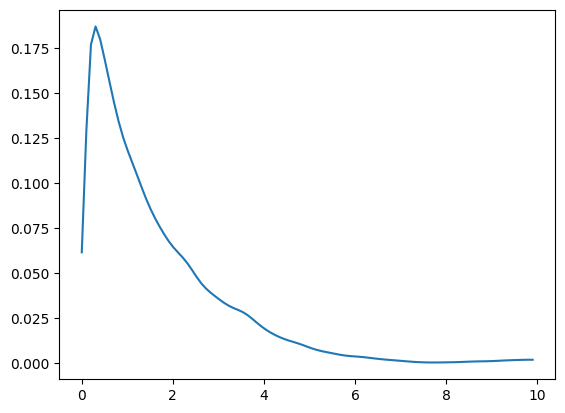

In [35]:
similarities_btw_s1_s2 = similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

In [67]:
def similarity_btw_s1_s2_plot_compare_w(tmax=10,ind_nb=100):
    #defining all quantities used in the simulation
    d1, d2 = 10, 200
    E_spacing = 1.0
    Int_strength = 0.03

    w_vec=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    for w in w_vec:
        result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
        eigenenergies_total, eigenstates_total = H_total.eigenstates() 
        s1_list,s2_list=probs_schmidt_in_energy_eigenstates(result,eigenenergies_total,eigenstates_total,tlist,EI,w)
        similarities = []
        for idx in range(len(tlist)-1):
            d = 1-distance.cosine(s1_list[idx], s2_list[idx])
            similarities.append(d)
            
        plt.plot(tlist[0:len(tlist)-1], similarities)
        plt.xlabel('Time')
        plt.ylabel('cosine similarity')
        plt.title('Evolution of similarity between schmidt 1 and schmidt 2')
        plt.legend(['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
    plt.show()

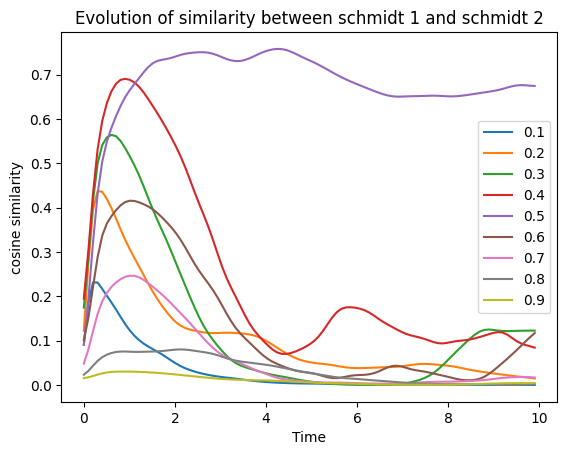

In [44]:
similarity_btw_s1_s2_plot_compare_w()

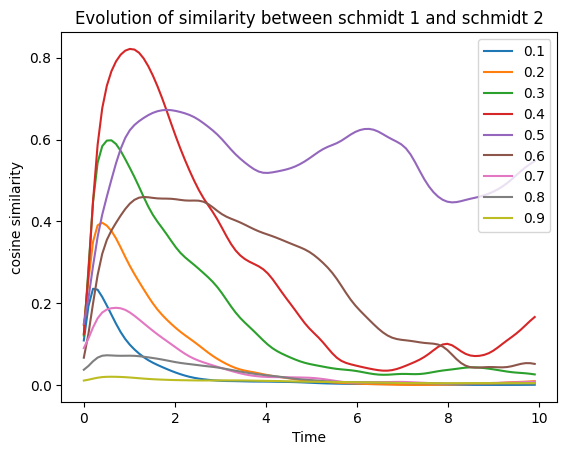

In [45]:
similarity_btw_s1_s2_plot_compare_w()

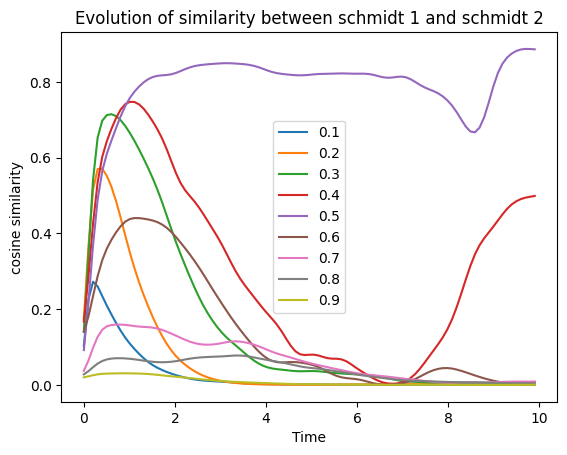

In [46]:
similarity_btw_s1_s2_plot_compare_w()

Alright. First note on this. w = 0.5 is way too different. Something weird is going on there, but i dont think its the order of the schmidts just going back and forth, since we dont see step changes in our other curves.

Probably just the randomness of it, but w=0.3/0.7 or 0.2/0.8 (ie opposite pairs) do not seem to be so similar.
Clearly, 0.1 and 0.9 are lower than all. But then the order is not super obvious, when looking at the max. The ones going to essentially zero are, 0.9 and 0.1 only.

The order and shape of the curves are pretty well repeated over 3 runs, so we conclude that for some reason, we dont have symmetry of considering w=0.3 and w=0.7. WHY???

Interestingly w=0.4 in the last graph shoots back up. We look at a longer run next.


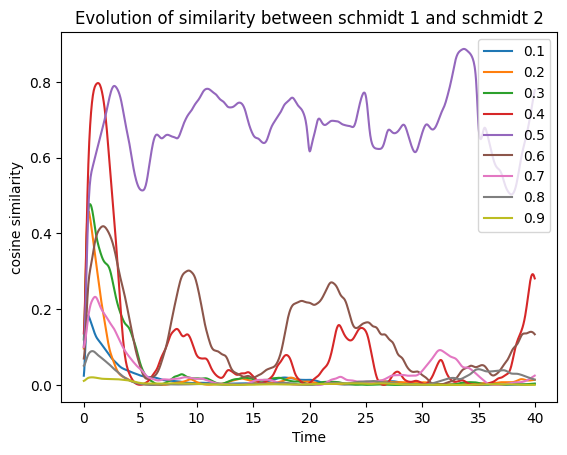

In [69]:
similarity_btw_s1_s2_plot_compare_w(40,1000)

So we see that other than w=0.5, they all more or less settle. Interestingly, w=0.3,0.4,0.6 are less settled. 

So, w around the quarters has makes the distributions fluctuate more differently. Could this be linked to the ability of the scdhmidt states to find stability? I want to explore the s1-s2 similarityv alongsisde the sienv(t) and sienv(t+k) similarity. It would be interesting to find that with w=0.3, the schmidt states have trouble finding stability, which would be reflected in this graph, and could maybe be explained by a non-equilibrium distribution in the energy spectrum


In [74]:

def similarity_btw_s1_s2_metric_plot(s1_list,s2_list,tlist,d1,d2):

    similarities = []
    for idx in range(len(tlist)-1):
        d=0
        for i in range(len(s1_list[idx])):
            d = d + 1-abs(s1_list[idx][i]-s2_list[idx][i])
        similarities.append(d/2)
    
    plt.plot(tlist[0:len(tlist)-1], similarities)
    plt.xlabel('Time')
    plt.ylabel('similarity metric')
    plt.title('Evolution of similarity between schmidt 1 and schmidt 2')

In [75]:
d1, d2 = 10, 200
E_spacing = 1.0
Int_strength = 0.03
tmax= 10
ind_nb = 100
w=0.3
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list=probs_schmidt_in_energy_eigenstates(result,eigenenergies_total,eigenstates_total,tlist,EI,w)

        

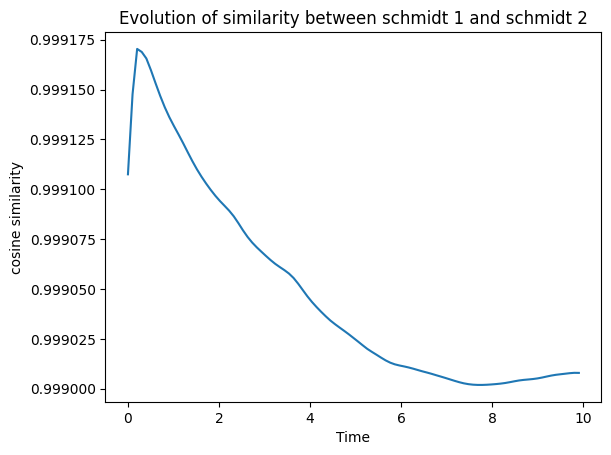

In [76]:

simi = similarity_btw_s1_s2_metric_plot(s1_list,s2_list,tlist,d1,d2)

In [87]:
def similarity_btw_s1_s2_metric_plot_compare_w(tmax= 10,ind_nb = 100):
    #defining all quantities used in the simulation
    d1, d2 = 10, 200
    E_spacing = 1.0
    Int_strength = 0.03

    w_vec=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    for w in w_vec:
        result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
        eigenenergies_total, eigenstates_total = H_total.eigenstates() 
        s1_list,s2_list=probs_schmidt_in_energy_eigenstates(result,eigenenergies_total,eigenstates_total,tlist,EI,w)
        similarities = []
        for idx in range(len(tlist)-1):
            d=0
            for i in range(len(s1_list[idx])):
                d = d + s1_list[idx][i]+s2_list[idx][i]-abs(s1_list[idx][i]-s2_list[idx][i])
            similarities.append(d/2)
        
        plt.plot(tlist[0:len(tlist)-1], similarities)
        plt.xlabel('Time')
        plt.ylabel('similarity metric')
        plt.title('Evolution of similarity metric sum(s1-s2-|s1-s2|) between schmidt 1 and schmidt 2')
        plt.legend(['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
    plt.show()


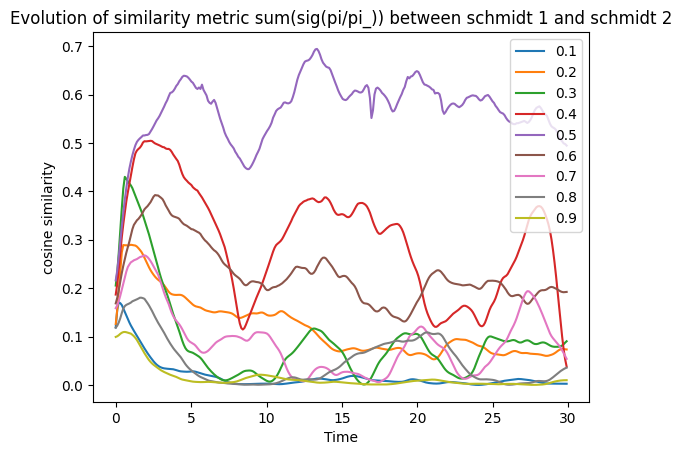

In [81]:
similarity_btw_s1_s2_metric_plot_compare_w(30,300)

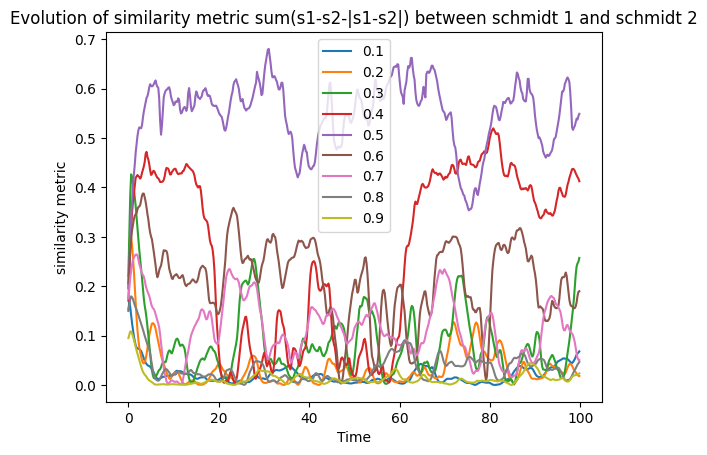

In [88]:
similarity_btw_s1_s2_metric_plot_compare_w(100,500)

Again we see a difference in bahavior for w = 0.5
But otherwize, its the same deal of similarity going up a bunch and then lowering quite a bit. 

Again, higher similarity for 0.4,0.6,0.3,0.2,0.7.

The similarity goes down relative to its initial peak for most w's. 
w=0.4 goes back up to its peak and stay there.

Would it be interesting to test the variation of similarity as EI changes? is it less noisy? 





What does comparing both similarity graphs tell us?

(Note they are plotted using different simulations, so with different random matrix, maybe run creat a function that does both at once for true comparison?)